**IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


**LOADING THE DATASET**

In [2]:
data = pd.read_csv("/content/train.csv")

**HANDLING MISSING VALUES**

In [3]:
# Handling missing numerical values
numerical_features = data.select_dtypes(include=["float64", "int64"]).columns
imputer = SimpleImputer(strategy="median")
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Handling missing categorical values
categorical_features = data.select_dtypes(include=["object"]).columns
imputer_cat = SimpleImputer(strategy="most_frequent")
data[categorical_features] = imputer_cat.fit_transform(data[categorical_features])

**ENCODING CATEGORICAL FEATURES**

In [4]:
# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

**FEATURE SCALING**

In [5]:
# Standardizing the features
scaler = StandardScaler()
X = data.drop("SalePrice", axis=1)  # Replace "SalePrice" with your target variable column name
X_scaled = scaler.fit_transform(X)
y = data["SalePrice"]

**SPLITTING THE DATA**

In [6]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**TRAINING THE LINEAR REGRESSION MODEL**

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

**EVALUATING THE MODEL**

In [8]:
# Making predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Printing evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")

Root Mean Squared Error (RMSE): 35344.20706864401
R-Squared (R2): 0.8371369170530625


**VISUALIZATION: ACTUAL VS. PREDICTED**

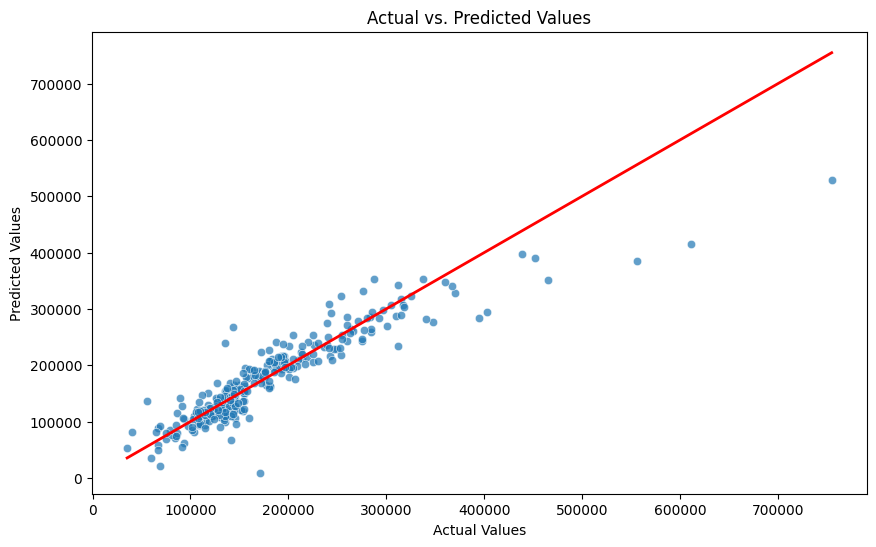

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor="w")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


**VISUALIZATION: RESIDUALS DISTRIBUTION**

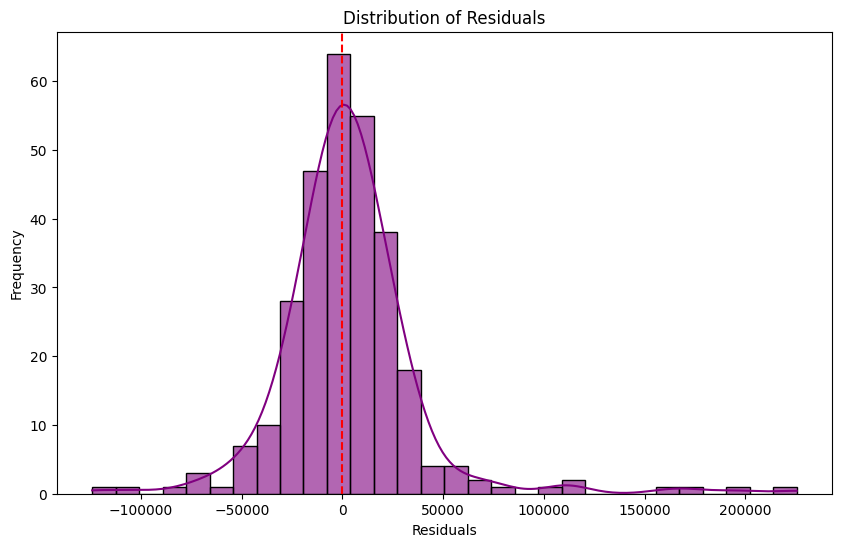

In [10]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple", alpha=0.6)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

**SAVING THE MODEL**

In [11]:
import joblib
joblib.dump(linear_model, "linear_regression_model.pkl")
print("Model saved successfully.")

Model saved successfully.
